# ARIMAX

In [2]:
import pandas as pd
import pyflux as pf

In [3]:
data = pd.read_csv("Final.csv")
data.rename(columns = {"Unnamed: 0":"Date"},inplace=True)
data.set_index("Date",inplace=True)
data.columns = [i.replace(" ","_") for  i in data.columns]
data

,zone_name,hh_zonal,nhh_zonal,residual,year,log_nd,inflation,operation_cost,amortization,revenue,total_liabilities,net_payroll_costs,number_of_employees,tax,adj_close,volume
Date,,,,,,,,,,,,,,,,
2007-12-31,Southern Scotland,6.362303,0.830136,14.061505,2007.0,20.319042,5.588235,1433.0,245.0,1991.0,5887.0,89.0,2073.0,126.0,393.191688,3.193817e+08
2007-12-31,Northern,9.884146,1.287148,14.061505,2007.0,20.319042,5.588235,1433.0,245.0,1991.0,5887.0,89.0,2073.0,126.0,393.191688,3.193817e+08
2007-12-31,North West,13.646168,1.734890,14.061505,2007.0,20.319042,5.588235,1433.0,245.0,1991.0,5887.0,89.0,2073.0,126.0,393.191688,3.193817e+08
2007-12-31,Yorkshire,13.615270,1.750626,14.061505,2007.0,20.319042,5.588235,1433.0,245.0,1991.0,5887.0,89.0,2073.0,126.0,393.191688,3.193817e+08
2007-12-31,N Wales & Mersey,14.084355,1.805802,14.061505,2007.0,20.319042,5.588235,1433.0,245.0,1991.0,5887.0,89.0,2073.0,126.0,393.191688,3.193817e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-31,South Wales,45.804410,5.552697,46.933426,2018.0,20.087578,6.866538,3125.0,464.0,4158.0,10682.0,181.0,3679.0,165.0,739.531153,2.155613e+08
2018-12-31,South East,52.110398,7.713198,46.933426,2018.0,20.087578,6.866538,3125.0,464.0,4158.0,10682.0,181.0,3679.0,165.0,739.531153,2.155613e+08
2018-12-31,London,54.906683,6.106170,46.933426,2018.0,20.087578,6.866538,3125.0,464.0,4158.0,10682.0,181.0,3679.0,165.0,739.531153,2.155613e+08


In [4]:
temp = data[data.zone_name == "Northern"]
temp.drop("zone_name",axis=1,inplace=True)

In [9]:
model = pf.ARIMAX(data=temp, formula='hh_zonal~1+log_nd+revenue+net_payroll_costs',ar=1, ma=0)
x = model.fit("MLE")
x.summary()

Normal ARIMAX(1,0,0)                                                                                      
======================================================= ==================================================
Dependent Variable: hh_zonal                            Method: MLE                                       
Start Date: 2008-12-31                                  Log Likelihood: -26.7863                          
End Date: 2018-12-31                                    AIC: 65.5725                                      
Number of observations: 11                              BIC: 67.9599                                      
Latent Variable                          Estimate   Std Error  z        P>|z|    95% C.I.                 
======================================== ========== ========== ======== ======== =========================
AR(1)                                    0.047      0.4708     0.0998   0.9205   (-0.8758 | 0.9698)       
Beta 1                               

In [10]:
model.predict(oos_data=temp,h=7)

,hh_zonal
Date,
2012-12-31,9.011932
2013-12-31,9.184762
2014-12-31,15.392837
2015-12-31,14.807750
2016-12-31,15.415236
2017-12-31,18.986138
2018-12-31,23.749770


In [11]:
import matplotlib.pyplot as plt

ValueError: x and y must have same first dimension, but have shapes (11,) and (21,)

<Figure size 720x720 with 0 Axes>

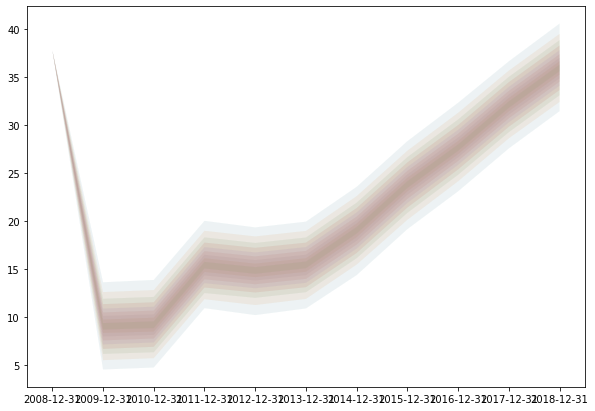

In [12]:
plt.figure(figsize=(10,10))
model.plot_predict(h=10,oos_data=temp)


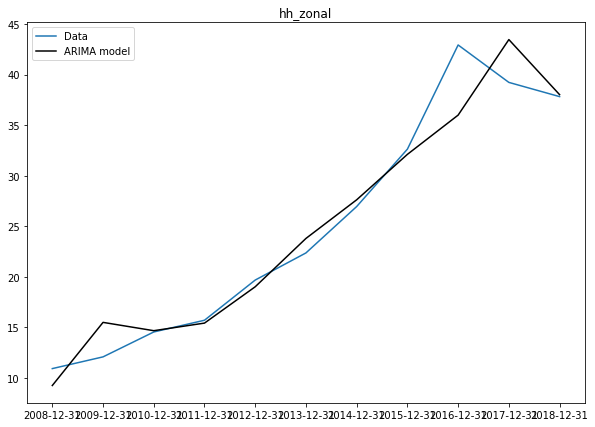

TypeError: xlabel() missing 1 required positional argument: 'xlabel'

In [16]:
model.plot_fit()
plt.xticls(rotation=90)

### 

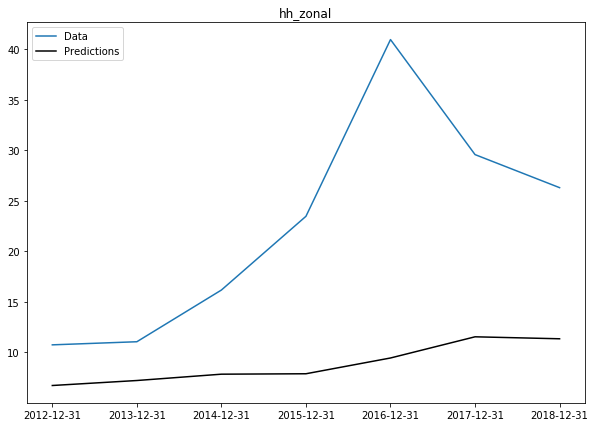

In [487]:
model.plot_predict_is(h=7)

In [488]:
model.predict_is(oos_data= temp,h=3)

,hh_zonal
Date,
2016-12-31,25.471406
2017-12-31,30.934779
2018-12-31,26.676101


In [491]:
model.predict(oos_data=temp,intervals = True)

,hh_zonal,1% Prediction Interval,5% Prediction Interval,95% Prediction Interval,99% Prediction Interval
Date,,,,,
2014-12-31,17.129433,6.553885,9.721990,24.661349,28.027364
2015-12-31,9.550684,-1.288808,1.628659,17.446570,20.461464
2016-12-31,4.315764,-6.577347,-3.476184,11.973146,15.286266
2017-12-31,9.763397,-1.389599,1.902349,17.768636,20.837415
2018-12-31,13.963524,2.717301,6.085002,21.724438,25.114543


In [493]:
model.predict_is(h=7)

,hh_zonal
Date,
2012-12-31,6.715880
2013-12-31,7.209865
2014-12-31,7.836605
2015-12-31,7.878888
2016-12-31,9.440260
2017-12-31,11.537791
2018-12-31,11.341986


In [85]:
model.predict(oos_data=temp,h=10)

,hh_zonal
Date,
2009-12-31,15.175566
2010-12-31,11.081468
2011-12-31,13.960536
2012-12-31,15.459391
2013-12-31,16.009763
2014-12-31,19.463818
2015-12-31,21.902425
2016-12-31,25.251313
2017-12-31,31.511777


ValueError: x and y must have same first dimension, but have shapes (11,) and (16,)

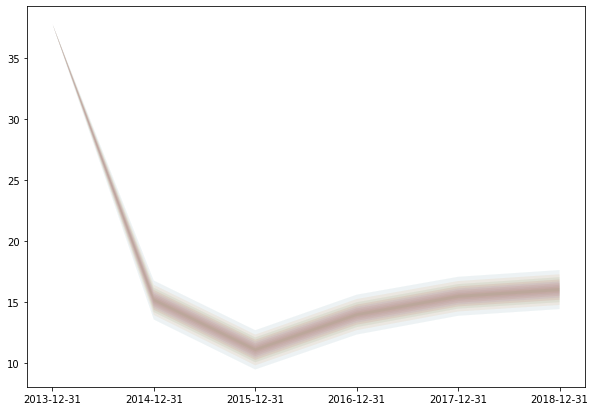

In [88]:
model.plot_predict(h=5,oos_data=temp)

In [108]:
model = pf.DynReg('hh_zonal ~ log_nd+operation_cost+revenue', data=temp)

In [109]:
x = model.fit()

In [110]:
x.summary()

Dynamic Linear Regression                                                                                 
======================================================= ==================================================
Dependent Variable: hh_zonal                            Method: MLE                                       
Start Date: 2007-12-31                                  Log Likelihood: -47.5491                          
End Date: 2018-12-31                                    AIC: 105.0982                                     
Number of observations: 12                              BIC: 107.5228                                     
Latent Variable                          Estimate   Std Error  z        P>|z|    95% C.I.                 
======================================== ========== ========== ======== ======== =========================
Sigma^2 irregular                        0.2071                                                           
Sigma^2 1                            

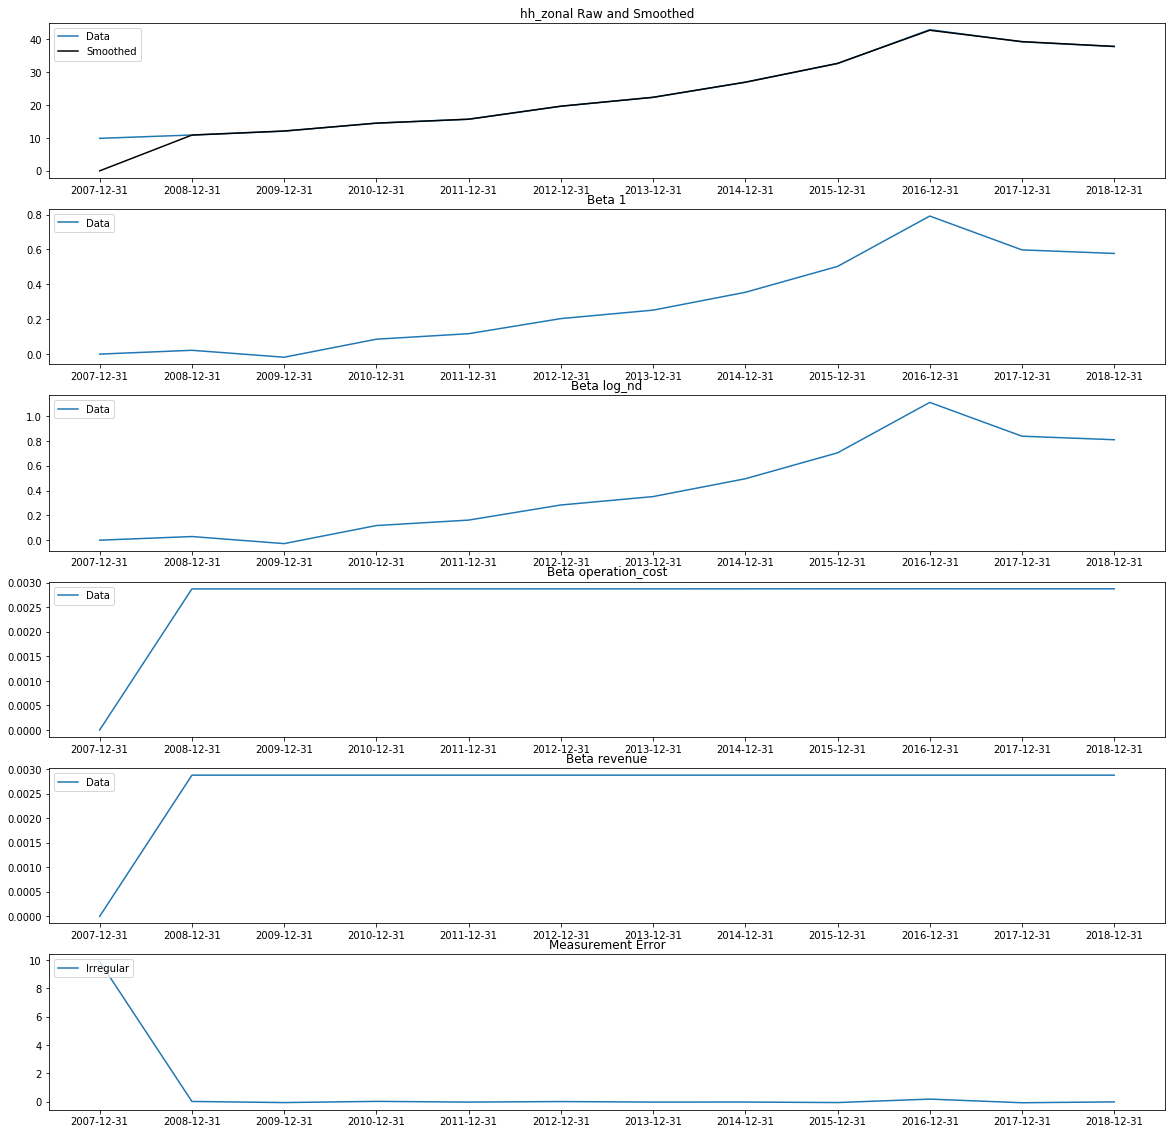

In [111]:
model.plot_fit(figsize=(20,20))

In [128]:
model.plot_predict(h=10,oos_data=temp)

TypeError: _forecast_model() missing 1 required positional argument: 'h'

In [141]:
import operator
import numpy as np
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
features_dict = {}
from sklearn.feature_selection import SelectKBest,SelectFromModel
def create_lasso_feat_plot(df,zone_name,var="hh_zonal",alpha=0.01):
    #creating vectors
    print('For',zone_name)

    
    temp = df[df.zone_name == zone_name]
    temp.drop(["zone_name",'year'],axis=1,inplace=True)
    X = temp.drop(var,axis=1)
    y = temp[[var]]
    #print(temp)
    lasso = Lasso()
    
    params = {"alpha":[1e-15,1e-10,1e-3,1e-2,1,5,10,20]}
    #print("PIN")
    lasso_reg = GridSearchCV(lasso,params,scoring="neg_mean_squared_error",cv=5)
    #print("PIN")
    lasso_reg.fit(X,y)
    
    sel_ = SelectFromModel(lasso_reg.best_estimator_)
    sel_.fit(X,y)
    
  
    
    
    
    
    
    coef_lasso = pd.Series(lasso_reg.best_estimator_.coef_,index = X.columns)
    print("LASSO coef:")
    print(coef_lasso)
    print('***************************************')
    selected_feat = X.columns[(sel_.get_support())]
    print('For',zone_name)
    print('total features: {}'.format((X.shape[1])))
    print('selected features: {}'.format(len(selected_feat)))
    print('features with coefficients shrank to zero: {}'.format(
          np.sum(sel_.estimator_.coef_ == 0))) 
    
    indicies = [i for i, x in enumerate(sel_.get_support()) if x]
    selected_features = operator.itemgetter(*indicies)(X.columns)
    print("\n")
    print("Selected features: ",selected_features)
    features_dict[zone_name] = selected_features
    print('***********************************************************')

In [142]:
zones = data.zone_name.unique()
### The sign of the coeff gives the sign of the correlation between the feature and the residual.
for i in zones:
    create_lasso_feat_plot(data,zone_name=i,var="hh_zonal")

For Southern Scotland
LASSO coef:
nhh_zonal              4.840465e+00
residual               5.437024e-02
log_nd                -5.085465e-01
inflation             -3.348963e-02
operation_cost        -4.466782e-03
amortization           1.102435e-02
revenue                2.604892e-03
total_liabilities     -4.610505e-04
net_payroll_costs      5.308114e-02
number_of_employees   -9.364304e-04
tax                    9.183106e-03
adj_close              8.984093e-03
volume                -7.293294e-09
dtype: float64
***************************************
For Southern Scotland
total features: 13
selected features: 12
features with coefficients shrank to zero: 0


Selected features:  ('nhh_zonal', 'residual', 'log_nd', 'inflation', 'operation_cost', 'amortization', 'revenue', 'total_liabilities', 'net_payroll_costs', 'number_of_employees', 'tax', 'adj_close')
***********************************************************
For Northern
LASSO coef:
nhh_zonal              3.895637e+00
residual     

LASSO coef:
nhh_zonal              0.000000e+00
residual               3.661280e-02
log_nd                 0.000000e+00
inflation              0.000000e+00
operation_cost         7.340476e-03
amortization           2.282542e-02
revenue                5.032481e-03
total_liabilities     -2.730183e-03
net_payroll_costs      6.808100e-03
number_of_employees    4.519944e-03
tax                    2.800077e-02
adj_close              2.103373e-02
volume                 3.496015e-09
dtype: float64
***************************************
For London
total features: 13
selected features: 9
features with coefficients shrank to zero: 3


Selected features:  ('residual', 'operation_cost', 'amortization', 'revenue', 'total_liabilities', 'net_payroll_costs', 'number_of_employees', 'tax', 'adj_close')
***********************************************************
For Southern
LASSO coef:
nhh_zonal              1.313193e+00
residual               3.648006e-02
log_nd                -0.000000e+00
inflation  

In [145]:
features_dict["Northern"]

('nhh_zonal',
 'residual',
 'log_nd',
 'inflation',
 'operation_cost',
 'amortization',
 'revenue',
 'total_liabilities',
 'net_payroll_costs',
 'number_of_employees',
 'tax',
 'adj_close')

In [155]:
temp[list(features_dict["Northern"])]

,nhh_zonal,residual,log_nd,inflation,operation_cost,amortization,revenue,total_liabilities,net_payroll_costs,number_of_employees,tax,adj_close
Date,,,,,,,,,,,,
2007-12-31,1.287148,14.061505,20.319042,5.588235,1433.0,245.0,1991.0,5887.0,89.0,2073.0,126.0,393.191688
2008-12-31,1.424364,15.403402,20.313523,17.130920,1461.0,244.0,2106.0,6299.0,94.0,2288.0,140.0,371.787890
2009-12-31,1.598288,16.943694,20.260050,0.237812,1848.0,221.0,2566.0,6681.0,111.0,2352.0,153.0,335.913735
2010-12-31,1.993796,18.558560,20.277094,5.812574,1693.0,240.0,2484.0,6885.0,97.0,2488.0,183.0,367.357994
2011-12-31,2.170176,3.607933,20.238285,11.883410,1730.0,264.0,2549.0,7022.0,112.0,2784.0,139.0,434.997279
2012-12-31,2.720973,22.828373,20.241926,5.010020,1948.0,276.0,2813.0,8178.0,121.0,2978.0,101.0,508.046112
2013-12-31,3.079732,25.408454,20.230591,3.339695,2102.0,325.0,3111.0,9854.0,104.0,3229.0,161.0,605.459168
2014-12-31,3.666178,30.052442,20.180207,0.092336,2375.0,341.0,3393.0,9559.0,120.0,3044.0,79.0,725.807424
2015-12-31,4.283661,35.634955,20.151214,-7.749077,2529.0,375.0,3713.0,10467.0,133.0,3270.0,203.0,779.542343


In [196]:
model = pf.VAR(data=temp[["nhh_zonal","hh_zonal"]], lags=1)

In [197]:
model

In [198]:
model_fit  = model.fit()

In [199]:
model_fit.summary()

VAR(1)                                                                                                    
======================================================= ==================================================
Dependent Variable: nhh_zonal,hh_zonal                  Method: OLS                                       
Start Date: 2008-12-31                                  Log Likelihood: -14.3274                          
End Date: 2018-12-31                                    AIC: 46.6547                                      
Number of observations: 11                              BIC: 50.2358                                      
Latent Variable                          Estimate   Std Error  z        P>|z|    95% C.I.                 
======================================== ========== ========== ======== ======== =========================
nhh_zonal Constant                       -0.6883    0.2768     -2.4865  0.0129   (-1.2309 | -0.1458)      
nhh_zonal AR(1)                      

In [203]:
model.predict_is(h=5)

,nhh_zonal,hh_zonal
Date,,
2014-12-31,3.479961,25.257276
2015-12-31,4.331131,32.321789
2016-12-31,4.975181,40.121024
2017-12-31,3.834880,43.940374
2018-12-31,5.896467,39.551679


In [202]:
temp

,hh_zonal,nhh_zonal,residual,year,log_nd,inflation,operation_cost,amortization,revenue,total_liabilities,net_payroll_costs,number_of_employees,tax,adj_close,volume
Date,,,,,,,,,,,,,,,
2007-12-31,9.884146,1.287148,14.061505,2007.0,20.319042,5.588235,1433.0,245.0,1991.0,5887.0,89.0,2073.0,126.0,393.191688,3.193817e+08
2008-12-31,10.899023,1.424364,15.403402,2008.0,20.313523,17.130920,1461.0,244.0,2106.0,6299.0,94.0,2288.0,140.0,371.787890,2.007195e+08
2009-12-31,12.059398,1.598288,16.943694,2009.0,20.260050,0.237812,1848.0,221.0,2566.0,6681.0,111.0,2352.0,153.0,335.913735,1.465296e+08
2010-12-31,14.523126,1.993796,18.558560,2010.0,20.277094,5.812574,1693.0,240.0,2484.0,6885.0,97.0,2488.0,183.0,367.357994,1.723851e+08
2011-12-31,15.684824,2.170176,3.607933,2011.0,20.238285,11.883410,1730.0,264.0,2549.0,7022.0,112.0,2784.0,139.0,434.997279,1.566390e+08
2012-12-31,19.662769,2.720973,22.828373,2012.0,20.241926,5.010020,1948.0,276.0,2813.0,8178.0,121.0,2978.0,101.0,508.046112,1.361455e+08
2013-12-31,22.346537,3.079732,25.408454,2013.0,20.230591,3.339695,2102.0,325.0,3111.0,9854.0,104.0,3229.0,161.0,605.459168,1.262065e+08
2014-12-31,26.938177,3.666178,30.052442,2014.0,20.180207,0.092336,2375.0,341.0,3393.0,9559.0,120.0,3044.0,79.0,725.807424,1.365219e+08
2015-12-31,32.617844,4.283661,35.634955,2015.0,20.151214,-7.749077,2529.0,375.0,3713.0,10467.0,133.0,3270.0,203.0,779.542343,1.603617e+08


In [178]:
data.pivot(index = "year",columns="zone_name",values="hh_zonal")

zone_name,East Midlands,Eastern,London,Midlands,N Wales & Mersey,North West,Northern,Northern Scotland,South East,South Wales,South Western,Southern,Southern Scotland,Yorkshire
year,,,,,,,,,,,,,,
2007.0,16.370802,17.060375,22.164365,17.807318,14.084355,13.646168,9.884146,NaN,20.076054,21.537451,23.770560,21.100281,6.362303,13.615270
2008.0,17.620712,18.364952,23.548992,19.147817,15.460156,14.911638,10.899023,NaN,21.500870,23.230707,25.212997,22.194810,7.950377,14.829178
2009.0,19.130238,20.005702,25.904688,20.526611,16.888703,16.542926,12.059398,3.379238,23.844075,23.683651,25.631634,24.471461,9.066432,16.297940
2010.0,20.934125,21.835099,26.756942,22.692635,18.891869,18.426326,14.523126,5.865932,24.633810,22.524989,26.057832,25.494450,11.218687,18.344745
2011.0,22.205396,22.671734,27.943266,23.811436,20.204644,19.449161,15.684824,6.535401,26.737000,22.846195,28.408897,27.567648,11.730556,19.582975
2012.0,25.451532,25.952047,31.174616,27.358246,23.639502,22.838742,19.662769,10.741418,28.248124,25.257265,31.062748,30.613447,16.001744,23.180244
2013.0,28.213308,29.891866,34.083066,29.201069,25.631093,25.184470,22.346537,11.048877,32.827362,27.541773,33.551731,33.752057,16.789820,25.485035
2014.0,33.099594,34.626967,38.547848,33.782559,29.715987,29.640148,26.938177,16.168316,37.659037,32.317145,38.699518,38.786441,21.236592,30.248609
2015.0,39.066214,41.176427,46.237472,39.629994,35.620770,35.683316,32.617844,23.469195,43.738784,37.608777,43.979049,44.786928,26.789320,36.287690


In [211]:
dar = pf.DAR(data=temp, ar=1, integ=0, target='hh_zonal')

In [212]:
dar_fit = dar.fit()
dar_fit.summary()

DAR(1, integrated=0)                                                                                      
======================================================= ==================================================
Dependent Variable: hh_zonal                            Method: MLE                                       
Start Date: 2008-12-31                                  Log Likelihood: -37.2738                          
End Date: 2018-12-31                                    AIC: 80.5477                                      
Number of observations: 11                              BIC: 81.7414                                      
Latent Variable                          Estimate   Std Error  z        P>|z|    95% C.I.                 
======================================== ========== ========== ======== ======== =========================
Sigma^2 irregular                        0.026                                                            
Constant                             

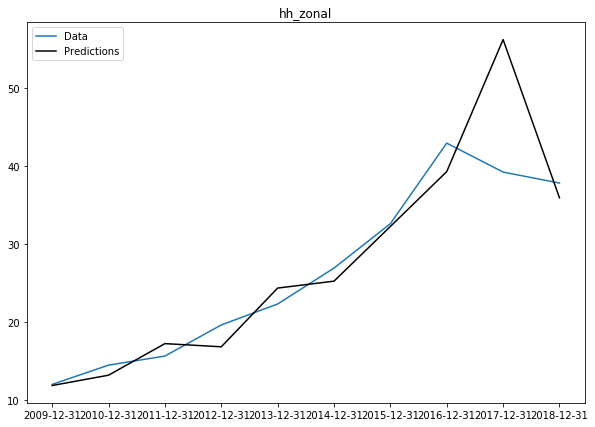

In [214]:
dar.plot_predict_is(h=10)

In [220]:
dar.predict_is(h=10)

,Series
Date,
2009-12-31,11.915287
2010-12-31,13.235371
2011-12-31,17.275085
2012-12-31,16.867386
2013-12-31,24.381474
2014-12-31,25.265859
2015-12-31,32.263480
2016-12-31,39.283271
2017-12-31,56.175907


In [221]:
model.predict_is(fit_method="MLE")

,nhh_zonal,hh_zonal
Date,,
2014-12-31,3.479961,25.257276
2015-12-31,4.331131,32.321789
2016-12-31,4.975181,40.121024
2017-12-31,3.834880,43.940374
2018-12-31,5.896467,39.551679


In [228]:
dar.predict_is(h=10)

,Series
Date,
2009-12-31,11.915287
2010-12-31,13.235371
2011-12-31,17.275085
2012-12-31,16.867386
2013-12-31,24.381474
2014-12-31,25.265859
2015-12-31,32.263480
2016-12-31,39.283271
2017-12-31,56.175907


In [223]:
temp

,hh_zonal,nhh_zonal,residual,year,log_nd,inflation,operation_cost,amortization,revenue,total_liabilities,net_payroll_costs,number_of_employees,tax,adj_close,volume
Date,,,,,,,,,,,,,,,
2007-12-31,9.884146,1.287148,14.061505,2007.0,20.319042,5.588235,1433.0,245.0,1991.0,5887.0,89.0,2073.0,126.0,393.191688,3.193817e+08
2008-12-31,10.899023,1.424364,15.403402,2008.0,20.313523,17.130920,1461.0,244.0,2106.0,6299.0,94.0,2288.0,140.0,371.787890,2.007195e+08
2009-12-31,12.059398,1.598288,16.943694,2009.0,20.260050,0.237812,1848.0,221.0,2566.0,6681.0,111.0,2352.0,153.0,335.913735,1.465296e+08
2010-12-31,14.523126,1.993796,18.558560,2010.0,20.277094,5.812574,1693.0,240.0,2484.0,6885.0,97.0,2488.0,183.0,367.357994,1.723851e+08
2011-12-31,15.684824,2.170176,3.607933,2011.0,20.238285,11.883410,1730.0,264.0,2549.0,7022.0,112.0,2784.0,139.0,434.997279,1.566390e+08
2012-12-31,19.662769,2.720973,22.828373,2012.0,20.241926,5.010020,1948.0,276.0,2813.0,8178.0,121.0,2978.0,101.0,508.046112,1.361455e+08
2013-12-31,22.346537,3.079732,25.408454,2013.0,20.230591,3.339695,2102.0,325.0,3111.0,9854.0,104.0,3229.0,161.0,605.459168,1.262065e+08
2014-12-31,26.938177,3.666178,30.052442,2014.0,20.180207,0.092336,2375.0,341.0,3393.0,9559.0,120.0,3044.0,79.0,725.807424,1.365219e+08
2015-12-31,32.617844,4.283661,35.634955,2015.0,20.151214,-7.749077,2529.0,375.0,3713.0,10467.0,133.0,3270.0,203.0,779.542343,1.603617e+08


In [234]:
dar.predict(h=10)

,hh_zonal
Date,
2009-12-31,36.297447
2010-12-31,34.656972
2011-12-31,32.885749
2012-12-31,30.973358
2013-12-31,28.908549
2014-12-31,26.679172
2015-12-31,24.272112
2016-12-31,21.673208
2017-12-31,18.867169


,hh_zonal,nhh_zonal,residual,year,log_nd,inflation,operation_cost,amortization,revenue,total_liabilities,...,zone_name_N Wales & Mersey,zone_name_North West,zone_name_Northern,zone_name_Northern Scotland,zone_name_South East,zone_name_South Wales,zone_name_South Western,zone_name_Southern,zone_name_Southern Scotland,zone_name_Yorkshire
Date,,,,,,,,,,,,,,,,,,,,,
2007-12-31,6.362303,0.830136,14.061505,2007.0,20.319042,5.588235,1433.0,245.0,1991.0,5887.0,...,0,0,0,0,0,0,0,0,1,0
2007-12-31,9.884146,1.287148,14.061505,2007.0,20.319042,5.588235,1433.0,245.0,1991.0,5887.0,...,0,0,1,0,0,0,0,0,0,0
2007-12-31,13.646168,1.734890,14.061505,2007.0,20.319042,5.588235,1433.0,245.0,1991.0,5887.0,...,0,1,0,0,0,0,0,0,0,0
2007-12-31,13.615270,1.750626,14.061505,2007.0,20.319042,5.588235,1433.0,245.0,1991.0,5887.0,...,0,0,0,0,0,0,0,0,0,1
2007-12-31,14.084355,1.805802,14.061505,2007.0,20.319042,5.588235,1433.0,245.0,1991.0,5887.0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-31,45.804410,5.552697,46.933426,2018.0,20.087578,6.866538,3125.0,464.0,4158.0,10682.0,...,0,0,0,0,0,1,0,0,0,0
2018-12-31,52.110398,7.713198,46.933426,2018.0,20.087578,6.866538,3125.0,464.0,4158.0,10682.0,...,0,0,0,0,1,0,0,0,0,0
2018-12-31,54.906683,6.106170,46.933426,2018.0,20.087578,6.866538,3125.0,464.0,4158.0,10682.0,...,0,0,0,0,0,0,0,0,0,0


# ElasticNet

In [283]:
from sklearn.linear_model import ElasticNet

In [433]:
el = ElasticNet()

In [434]:
X = pd.get_dummies(data).drop(["hh_zonal","year"],axis=1)

In [435]:
from sklearn.preprocessing import StandardScaler

In [436]:
y= pd.get_dummies(data).hh_zonal

In [437]:
from sklearn.model_selection import train_test_split

In [438]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1,random_state=42)

In [425]:
sc = StandardScaler()

In [426]:
X_train = sc.fit_transform(X_train)

In [427]:
pd.DataFrame(X_train,columns=X.columns)

,nhh_zonal,residual,log_nd,inflation,operation_cost,amortization,revenue,total_liabilities,net_payroll_costs,number_of_employees,...,zone_name_N Wales & Mersey,zone_name_North West,zone_name_Northern,zone_name_Northern Scotland,zone_name_South East,zone_name_South Wales,zone_name_South Western,zone_name_Southern,zone_name_Southern Scotland,zone_name_Yorkshire
0,-0.253307,-0.631088,0.895259,0.283171,-0.872431,-1.019785,-0.821414,-0.944603,-0.962404,-0.898799,...,-0.282330,-0.268221,-0.268221,-0.253546,-0.268221,-0.295958,-0.28233,-0.253546,-0.28233,-0.282330
1,0.090109,0.199160,-0.346363,-0.659115,0.302177,0.274644,0.312353,0.508049,-0.093782,0.138842,...,3.541956,-0.268221,-0.268221,-0.253546,-0.268221,-0.295958,-0.28233,-0.253546,-0.28233,-0.282330
2,-1.217127,-0.858998,1.362110,2.147626,-1.272004,-0.968521,-1.292882,-1.262948,-1.075703,-1.272051,...,-0.282330,-0.268221,-0.268221,-0.253546,-0.268221,-0.295958,-0.28233,-0.253546,-0.28233,3.541956
3,-0.235475,-0.322663,0.444578,0.150968,-0.433245,-0.558405,-0.411063,-0.242180,-0.056016,0.015669,...,-0.282330,-0.268221,-0.268221,-0.253546,-0.268221,-0.295958,-0.28233,-0.253546,-0.28233,-0.282330
4,-0.981617,-0.858998,1.362110,2.147626,-1.272004,-0.968521,-1.292882,-1.262948,-1.075703,-1.272051,...,-0.282330,-0.268221,-0.268221,-0.253546,-0.268221,-0.295958,-0.28233,-0.253546,-0.28233,-0.282330
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,-0.422114,-0.322663,0.444578,0.150968,-0.433245,-0.558405,-0.411063,-0.242180,-0.056016,0.015669,...,-0.282330,3.728270,-0.268221,-0.253546,-0.268221,-0.295958,-0.28233,-0.253546,-0.28233,-0.282330
145,0.653402,0.199160,-0.346363,-0.659115,0.302177,0.274644,0.312353,0.508049,-0.093782,0.138842,...,-0.282330,-0.268221,-0.268221,-0.253546,3.728270,-0.295958,-0.28233,-0.253546,-0.28233,-0.282330
146,-1.512872,-0.858998,1.362110,2.147626,-1.272004,-0.968521,-1.292882,-1.262948,-1.075703,-1.272051,...,-0.282330,-0.268221,3.728270,-0.253546,-0.268221,-0.295958,-0.28233,-0.253546,-0.28233,-0.282330
147,0.302771,-0.136293,0.299322,-0.124182,-0.168011,0.069586,-0.039377,0.668307,-0.698041,0.484101,...,-0.282330,-0.268221,-0.268221,-0.253546,3.728270,-0.295958,-0.28233,-0.253546,-0.28233,-0.282330


In [439]:
el.fit(X_train,y_train)

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [440]:
pred = el.predict(X_test)
pred

array([31.14210439, 44.83723411, 26.2792141 , 18.55161846, 27.03898504,
       17.78781074, 33.39691626, 19.58593042, 50.85872414, 35.61894318,
       17.97311404, 17.5147319 , 15.90141474, 24.61549169, 19.35222912,
       17.55203671, 44.3740788 ])

In [441]:
from sklearn.metrics import mean_squared_error

In [442]:
mean_squared_error(pred,y_test)

11.626659029992453

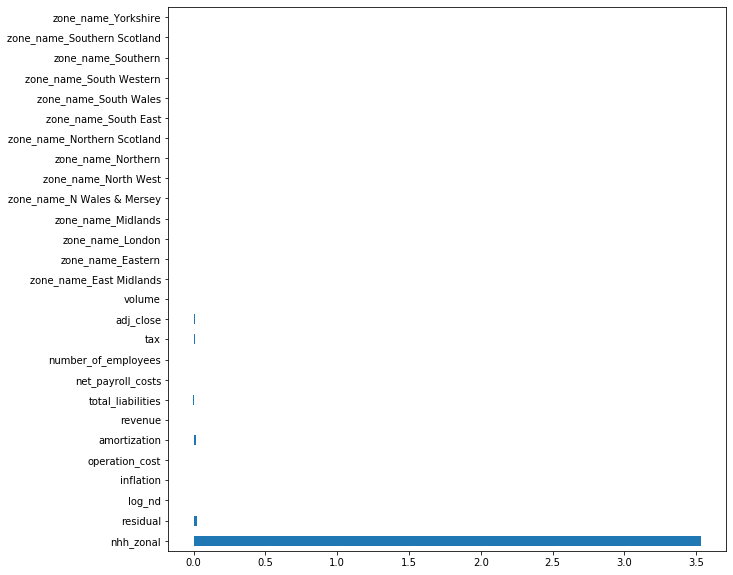

In [443]:
plt.figure(figsize=(10,10))
pd.Series(el.coef_,index=X.columns).plot(kind="barh")

In [446]:
zones

array(['Southern Scotland', 'Northern', 'North West', 'Yorkshire',
       'N Wales & Mersey', 'East Midlands', 'Midlands', 'Eastern',
       'South Wales', 'South East', 'London', 'Southern', 'South Western',
       'Northern Scotland'], dtype=object)

0.7101026798043611
14.461614439413022
9.74113175322417
5.97874299855677
0.5820955177066219
3.773497849728267
6.423639151947031
1.3109252724949159
8.016060802891506
4.018025667168997
40.86693726253507
15.417714735536839
4.56302876738756
227.15951754944763


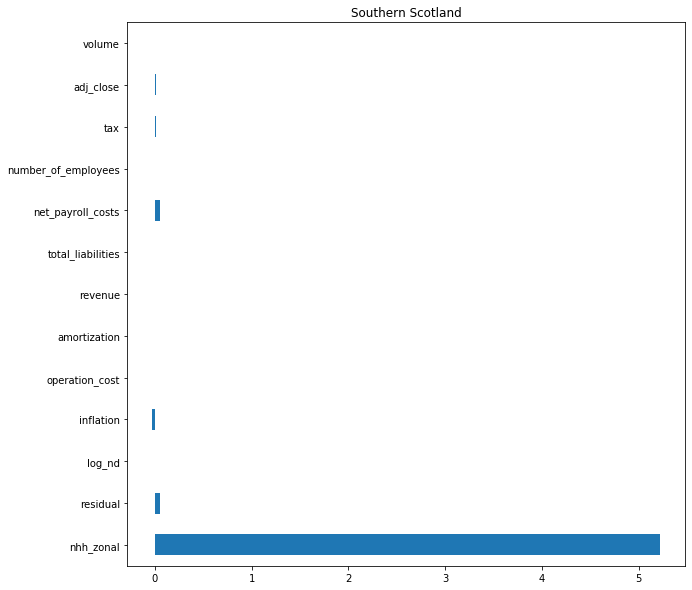

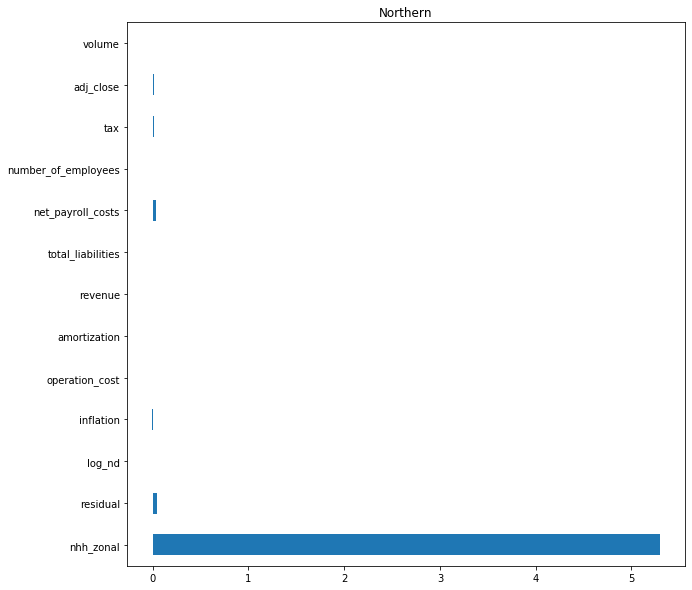

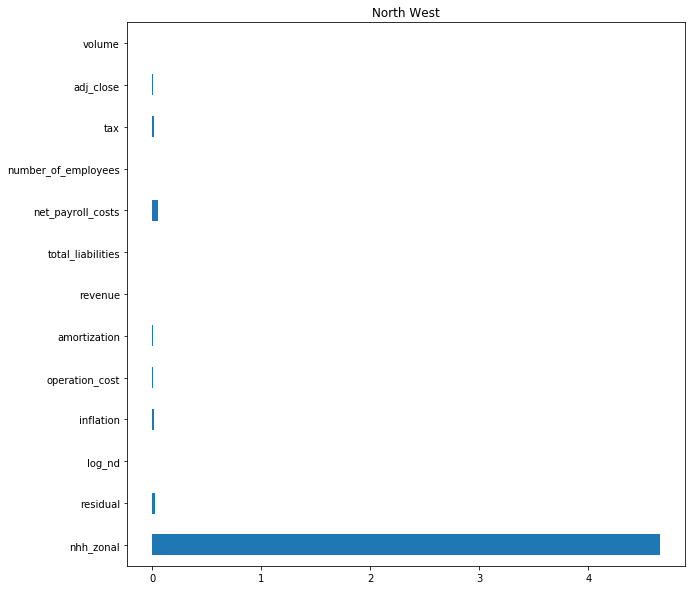

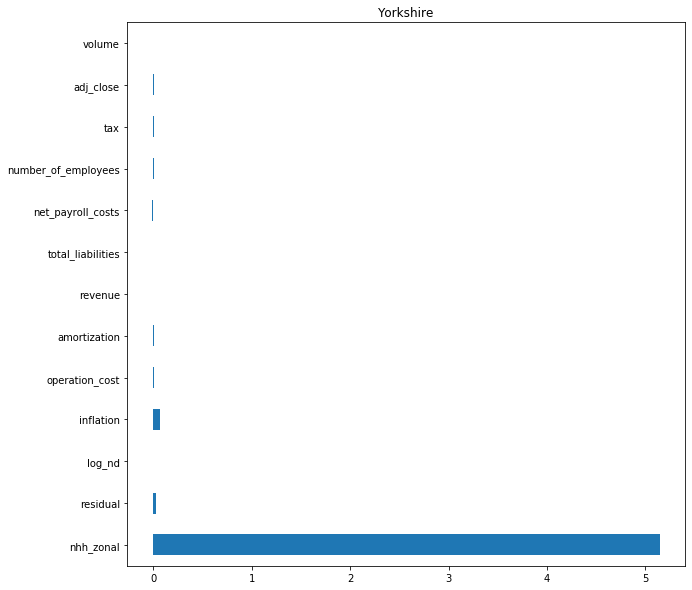

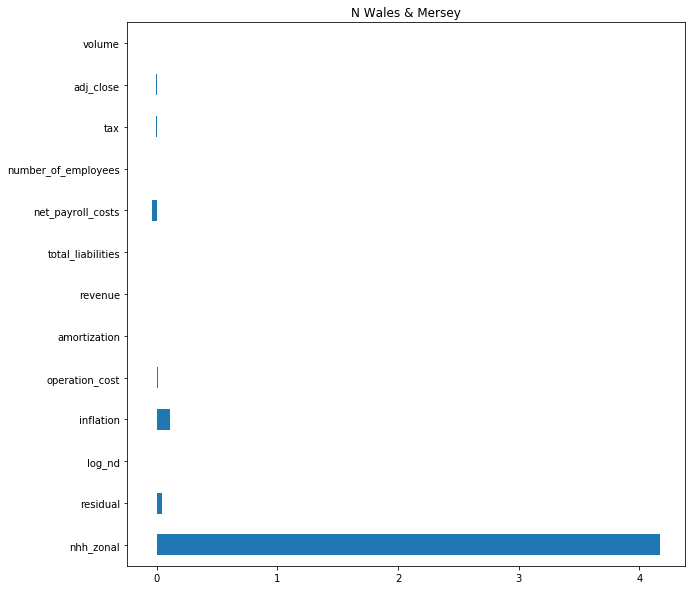

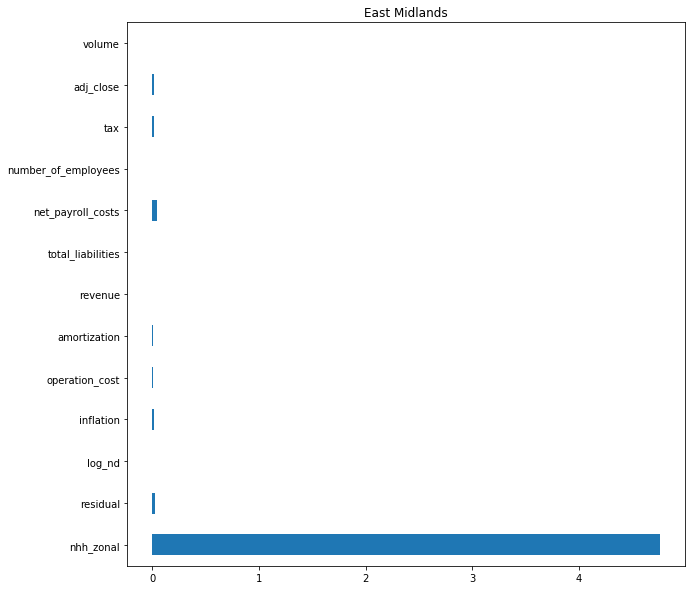

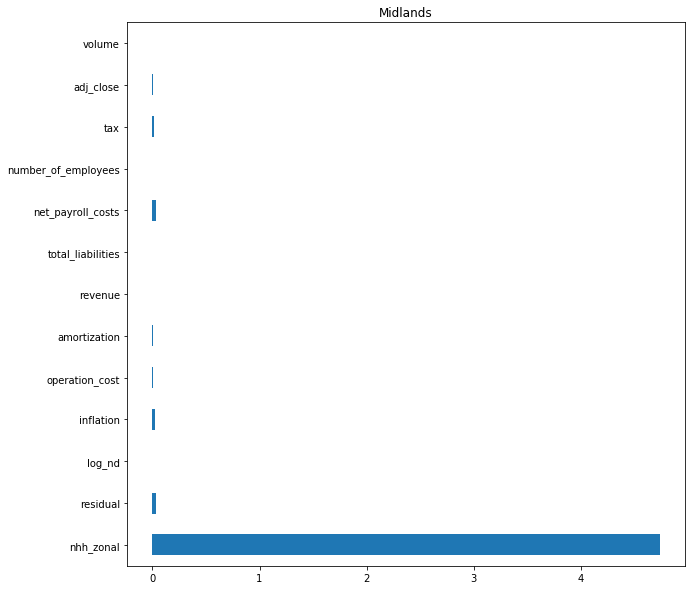

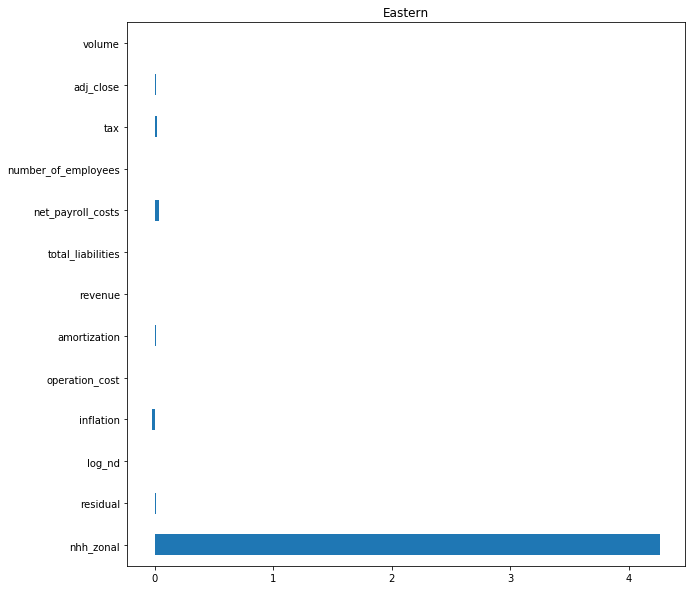

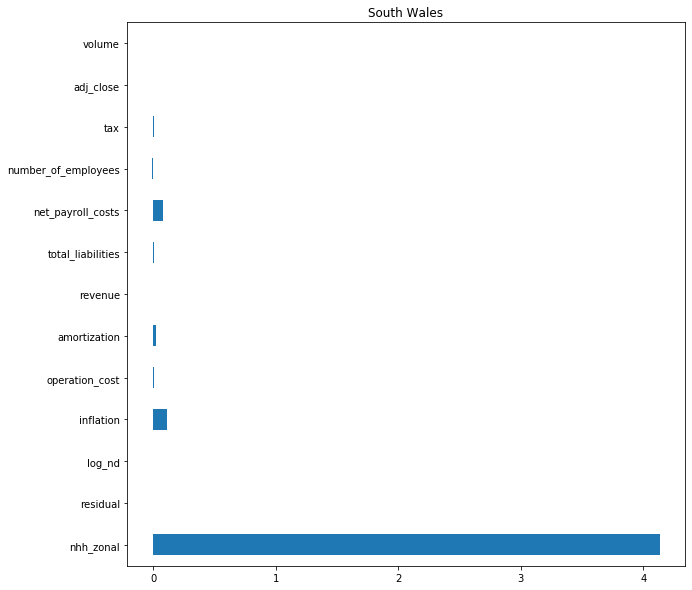

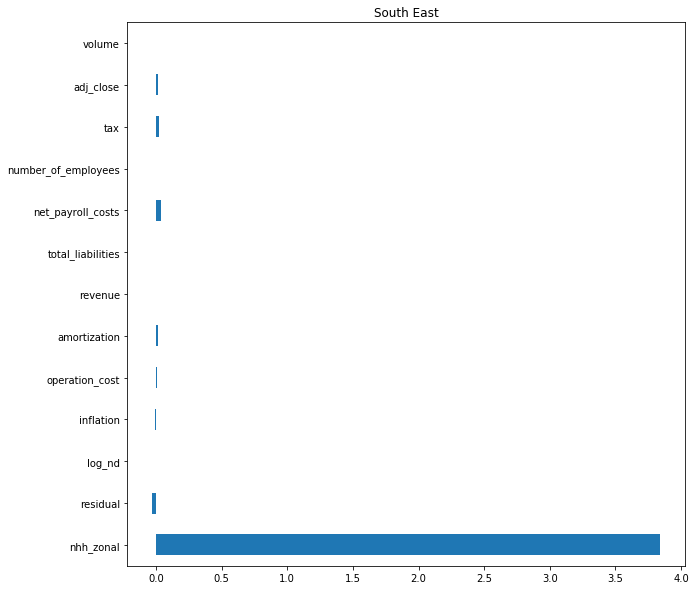

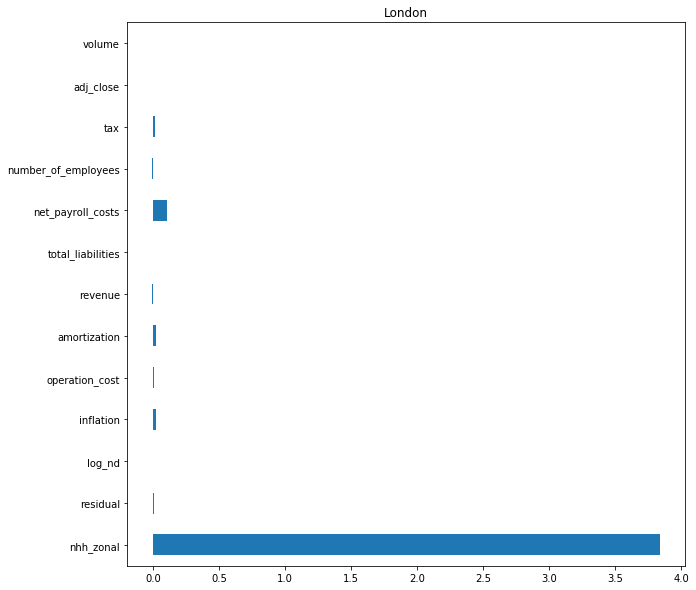

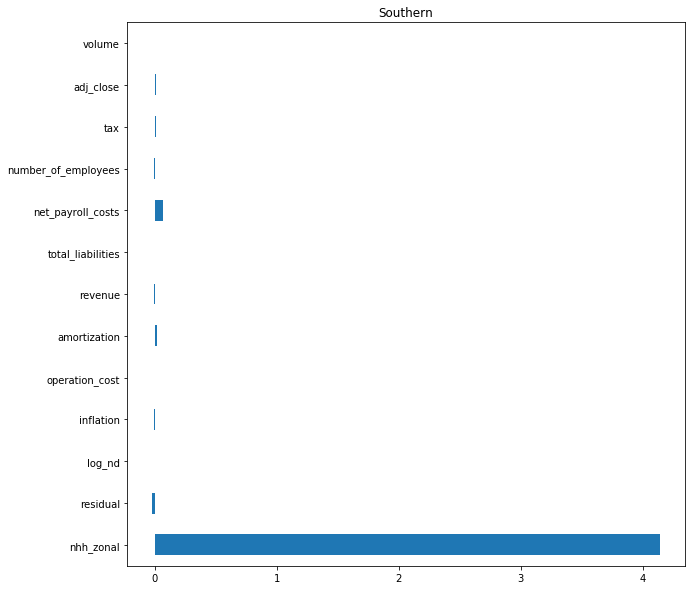

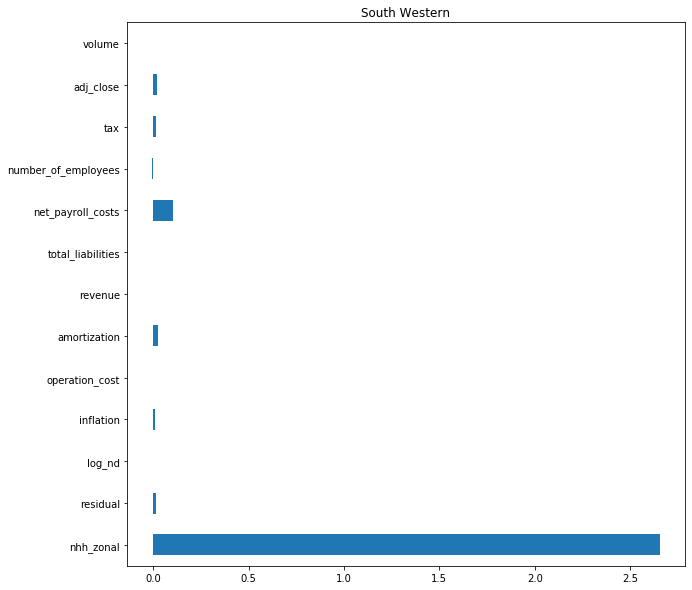

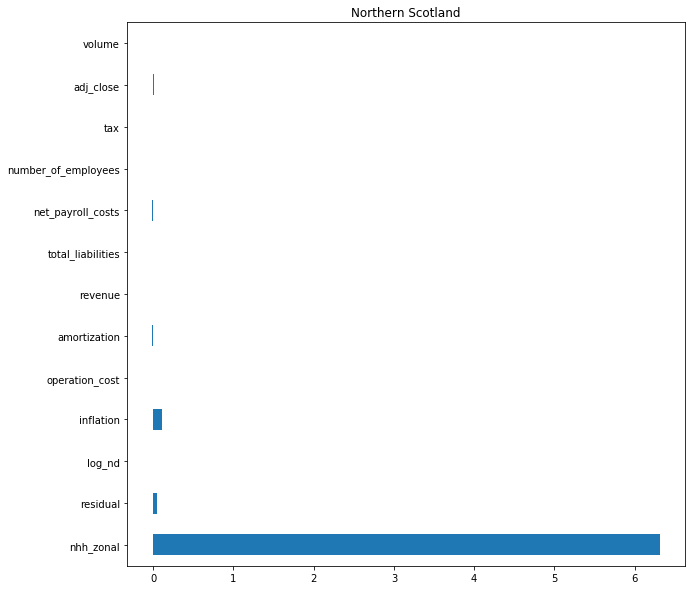

In [455]:
for i in zones:
    temp = data[data.zone_name == i]
    X = temp.drop(["hh_zonal","zone_name","year"],axis=1)
    y = temp.hh_zonal
    
    el = ElasticNet(alpha=0.001)
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1,random_state=42)
    el.fit(X_train,y_train)
    plt.figure(figsize=(10,10))
    pd.Series(el.coef_,index=X.columns).plot(kind="barh")
    plt.title(i)
    print(mean_squared_error(el.predict(X_test),y_test))
    #print("for zone:",i, "the coeff are",el.coef_)
    

### From here we see that the non-penalized feature is nhh_zonal, whihc is the best predictor for hh_zonal tariff. The other who were penalized, but not brought to zero were inflation and net_payroll_costs of National Grid

In [464]:
from statsmodels.tsa.holtwinters import Holt,ExponentialSmoothing

In [466]:
y_hat_avg = temp.copy()
fit1 = ExponentialSmoothing(np.asarray(temp['hh_zonal']),trend='add').fit()


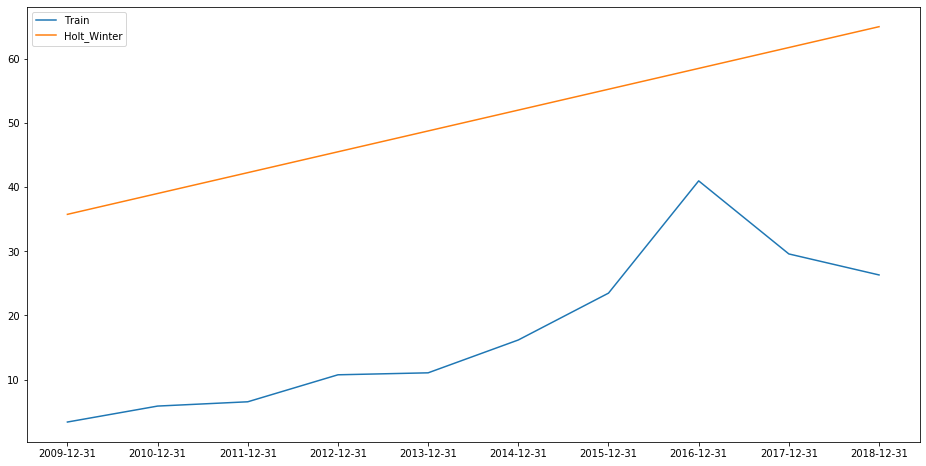

In [469]:
y_hat_avg['Holt_Winter'] = fit1.forecast(len(temp))
plt.figure(figsize=(16,8))
plt.plot( temp['hh_zonal'], label='Train')
plt.plot(y_hat_avg['Holt_Winter'], label='Holt_Winter')
plt.legend(loc='best')
plt.show()



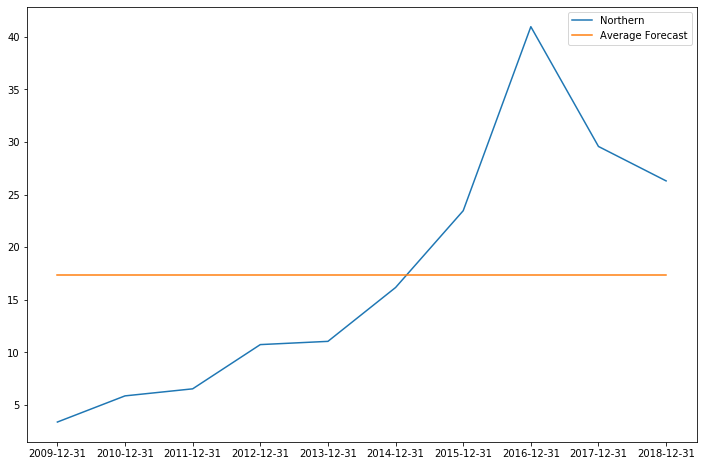

In [471]:
y_hat_avg = temp.copy()
y_hat_avg['avg_forecast'] = temp['hh_zonal'].mean()
plt.figure(figsize=(12,8))
plt.plot(temp['hh_zonal'], label='Northern')
plt.plot(y_hat_avg['avg_forecast'], label='Average Forecast')
plt.legend(loc='best')
plt.show()

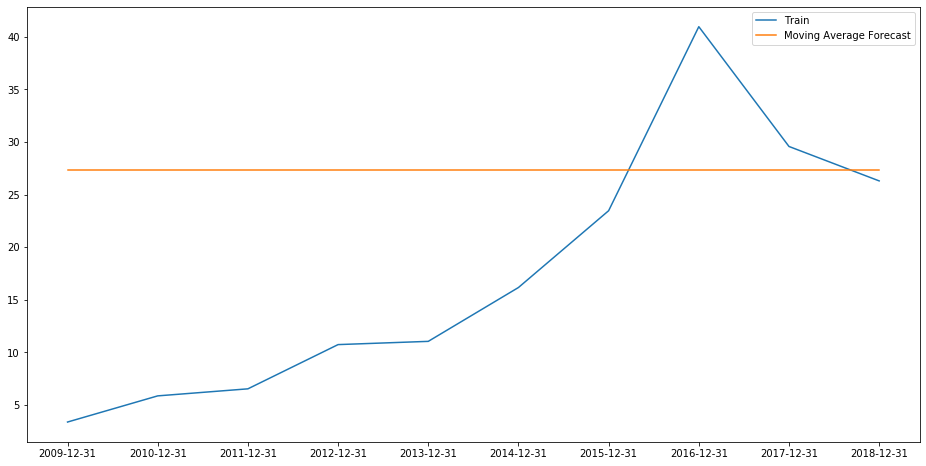

In [472]:
y_hat_avg['moving_avg_forecast'] = temp['hh_zonal'].rolling(5).mean().iloc[-1]
plt.figure(figsize=(16,8))
plt.plot(temp['hh_zonal'], label='Train')
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast')
plt.legend(loc='best')
plt.show()